# Modelando la Pandemia

  En este proyecto vamos a estudiar y analizar los datos mundiales de la pandemia COVID-19 usando países modelo de distintas políticas públicas para luego interpretar otras curvas.

Puedes descargar el dataset de casos totales, divididos por país [aquí.](
https://ourworldindata.org/coronavirus-data?country=
) Descarga los datos  formato .csv luego podrás cargarlos en el notebook usando pandas, a partir de eso selecciona los de los países que te interesan, hay un ejemplo de cómo se hace esto en este notebook. 

# ¿Cómo empezó la pandemia?


  La primer parte del trabajo consiste en estudiar cómo se empieza a propagar la pandemia, luego analizaremos las medidas tomadas y su efectividad.

  Al inicio de una pandemia, se estima que los contagios siguen una ley exponencial, esa es la fase de "crecimiento exponencial", luego hay un decaimiento dado por la inmunidad. 

  Los datos de casos confirmados en función del tiempo $C(t)$, pueden aproximarse con el modelo

$C(t)=e^{k(t-t_0)}$

donde $t_0$ es la fecha del primer contagio, y $k$ es un parámetro propio de cada enfermedad, que habla de la contagiosidad. Cuanto mayor es $k$, más grande será el número de casos confirmados dado por la expresión. $k$ depende de el tiempo que una persona enferma contagia, el nivel de infecciosidad del virus y cuántas personas que se pueden contagiar ve una persona enferma por día. Es decir, la circulación. Haciendo cuarententa, $k$ disminuye, con la circulación $k$ aumenta.

  El parámetro $k$ está directamente relacionado con el $R$ del que tanto se habla en los medios. En este proyecto haremos foco en $k$, pero puedes profundizar sobre esto si quieres, empezandó por [aquí](https://es.wikipedia.org/wiki/Ritmo_reproductivo_b%C3%A1sico). 

  Es posible hacer un modelo completo, pero para eso es necesario utilizar ecuaciones diferenciales. Si quieres profundizar sobre eso, busca información sobre "modelo epidemiológico SEIR". Si quieres ver cómo funciona este modelo, puedes empezar por [aquí](http://gabgoh.github.io/COVID/index.html). En ese link está implementado el modelo SEIR (no es necesario entender las ecuaciones en este caso) y el rol que cumplen los parámetros, puedes explorar el impacto de variar $R$ y el resto de los valores para ver cómo impactan en la cirva de contagios. Ahora utilizaremos la siguiente expresión para describir únicamente la etapa de crecimiento exponencial.


  Comienza estudiando cómo se distribuyó el $k$ inicial de la pandemia y si es posible elaborar un intervalo de confianza razonable para este valor. Para eso 
  
  1. Elegir diez países del norte (ahí empezó la pandemia) y puedes mide el valor de $k$ inicial de la pandemia, analizando datos del primer tramo.

  2. Analiza si es posible estimar la evolución mundial de la pandemia a partir de lo que obtuviste. Para esto, puedes elaborar un intervalo de confianza para $k$ a partir de los que obtuviste y así generar un modelo nuevo, basado en la distribución de $k$. Luego compara el modelo con los datos mundiales.

3. Piensa qué significa que el modelo de "bien" o dé "mal" ¿qué indicadores de esto existen?. Luego discute en el informe por qué crees que dio así. Recuerda que es importante elegir bien la población de muestra. Piensa qué criterios puedes elegir para representar bien la población mundial que se contagió al inicio de la pandemia.
 
 # Evaluando estrategias

 Ahora que tienes una manera de obtener información de las curvas, puedes intentar evaluar las estrategias de acción y el comportamiento de las poblaciones, construyendo un clasificador binario. 
1. Elige una categoría binaria que hable de políticas públicas elegidas por los países para enfrentar la pandemia que te interese estudiar, como pueden ser "la población hizo cuarententa" o "la población se vacunó".
2. Piensa qué indicadores de la curva pueden hablar del éxito de la política que quieres estudiar. Por ejemplo, si se tratase de evaluar el éxito de una cuarentena podría ser porcentaje de población  que se contagió o variación del valor de $k$ a partir de que se empezó a implementar esa medida. Elige al menos 3 indicadores.
3. Investiga sobre países que hayan aplicado o no esa política pública, para generar una base de datos. Por ejemplo, Brasil no hizo cuarentena y China hizo una muy estricta. Recuerda hacer una selección inteligente de la porción de datos de la curva de cada país que vas a analizar.
4. Construye un clasificador binario a partir de una regresión logística o usando Naive Bayes para intentar analizar la estrategia de otros países y ver si es posible predecirla a partir de la curva de contagios y el clasificador. Un posible clasificador binario es uno que clasifique el porcentaje de contagios en función da las categorías "la población hizo cuarentena" y "la población n hizo cuarentena". Haz esto para los 3 indicadores que elegiste en el punto 3 y compara los resultados.
5. Elabora un informe con lo que hayas aprendido a lo largo de este proyecto, donde discutas la utilidad o no de los indicadores que elegiste y del análisis estadístico propuesto.

#¡Comencemos!

  A continuación dejamos un ejemplo de cómo extraer el $k$ inicial de Argentina, usando un ajuste de cuadrados mínimos. Si necesitas los datos mundiales, en la columna de países aparecen como "World".



In [750]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy.optimize import curve_fit
import seaborn as sbn
import warnings
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

# EXPLORACION DE DATOS Y MEDICION DE K

Primero que nada, voy a cargar los datos, a revisar un poco los registros y columnas, analizandolas una por una para entender que significan cada una de ellas, para luego poder concluir con que datos contamos para poder transformarlos en informacion util para nuestra interpretacion y determinacion de conclusiones.

In [751]:
# Vamos a comenzar cargando todo nuestro dataset en una nueva variable "datos"
datos=pd.read_csv('covid_data.csv')
datos

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173022,ZWE,Africa,Zimbabwe,2022-03-26,245645.0,0.0,170.429,5436.0,0.0,1.429,16276.320,0.000,11.293,360.187,0.000,0.095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2682.0,0.178,0.0635,15.7,tests performed,8791728.0,4886242.0,3487962.0,417524.0,100086.0,83429.0,58.25,32.38,23.11,2.77,5528.0,66887.0,0.443,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
173023,ZWE,Africa,Zimbabwe,2022-03-27,245820.0,175.0,195.429,5438.0,2.0,1.714,16287.915,11.595,12.949,360.319,0.133,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2648.0,0.175,0.0738,13.5,tests performed,8845039.0,4918147.0,3493763.0,433129.0,53311.0,90629.0,58.61,32.59,23.

In [752]:
# Vamos a revisar la cantidad de registros con los que contamos en el dataset, y vamos a ver las columnas con las que contamos.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173027 entries, 0 to 173026
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    173027 non-null  object 
 1   continent                                   162746 non-null  object 
 2   location                                    173027 non-null  object 
 3   date                                        173027 non-null  object 
 4   total_cases                                 168993 non-null  float64
 5   new_cases                                   168842 non-null  float64
 6   new_cases_smoothed                          166849 non-null  float64
 7   total_deaths                                150945 non-null  float64
 8   new_deaths                                  150958 non-null  float64
 9   new_deaths_smoothed                         148809 non-null  float64
 

A continuacion voy a describir el significado de cada columna, para facilitar la comprension de mi dataset. Considero fundamental el hecho de que no exista niguna duda acerca del significado del dato al momento de interpretarlo, ya que puede prestar a un mal analisis. Si bien son muchisimas las columnas con las que contamos, se dejan detalladas a continuacion para que, en el caso de querer revisar el significado de alguna de ellas, se pueda volver a revisar esta seccion:

    - iso_code : ISO 3166-1 alpha-3 – three-letter country codes
    - continent: Continent of the geographical location
    - location: Geographical location
    - date: Date of observation
    - total_cases: Total confirmed cases of COVID-19. Counts can include probable cases, where reported.
    - new_cases: New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.
    - new_cases_smoothed: New confirmed cases of COVID-19 (7-day smoothed). Counts can include probable cases, where reported.
    - total_deaths: Total deaths attributed to COVID-19. Counts can include probable deaths, where reported.
    - new_deaths: New deaths attributed to COVID-19. Counts can include probable deaths, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA.                                 
    - new_deaths_smoothed: New deaths attributed to COVID-19 (7-day smoothed). Counts can include probable deaths, where reported.
    - total_cases_per_million: Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.
    - new_cases_per_million: New confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.
    - new_cases_smoothed_per_million: New confirmed cases of COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable cases, where reported.
    - total_deaths_per_million: Total deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.
    - new_deaths_per_million: New deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.
    - new_deaths_smoothed_per_million: New deaths attributed to COVID-19 (7-day smoothed) per 1,000,000 people. Counts can include probable deaths, where reported.
    - reproduction_rate: Real-time estimate of the effective reproduction rate (R) of COVID-19. See https://github.com/crondonm/TrackingR/tree/main/Estimates-Database
    - icu_patients: Number of COVID-19 patients in intensive care units (ICUs) on a given day
    - icu_patients_per_million: Number of COVID-19 patients in intensive care units (ICUs) on a given day per 1,000,000 people
    - hosp_patients: Number of COVID-19 patients in hospital on a given day
    - hosp_patients_per_million: Number of COVID-19 patients in hospital on a given day per 1,000,000 people 
    - weekly_icu_admissions: Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week
    - weekly_icu_admissions_per_million: Number of COVID-19 patients newly admitted to intensive care units (ICUs) in a given week per 1,000,000 people
    - weekly_hosp_admissions: Number of COVID-19 patients newly admitted to hospitals in a given week
    - weekly_hosp_admissions_per_million: Number of COVID-19 patients newly admitted to hospitals in a given week per 1,000,000 people
    - total_tests: Total tests for COVID-19
    - new_tests: New tests for COVID-19 (only calculated for consecutive days)
    - total_tests_per_thousand: Total tests for COVID-19 per 1,000 people
    - new_tests_per_thousand: New tests for COVID-19 per 1,000 people
    - new_tests_smoothed: New tests for COVID-19 (7-day smoothed). For countries that don't report testing data on a daily basis, we assume that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
    - new_tests_smoothed_per_thousand: New tests for COVID-19 (7-day smoothed) per 1,000 people
    - positive_rate: The share of COVID-19 tests that are positive, given as a rolling 7-day average (this is the inverse of tests_per_case)
    - tests_per_case: Tests conducted per new confirmed case of COVID-19, given as a rolling 7-day average (this is the inverse of positive_rate) 
    - tests_units: Units used by the location to report its testing data 
    - total_vaccinations: Total number of COVID-19 vaccination doses administered
    - people_vaccinated: Total number of people who received at least one vaccine dose
    - people_fully_vaccinated: Total number of people who received all doses prescribed by the initial vaccination protocol
    - total_boosters: Total number of COVID-19 vaccination booster doses administered (doses administered beyond the number prescribed by the vaccination protocol)
    - new_vaccinations: New COVID-19 vaccination doses administered (only calculated for consecutive days)
    - new_vaccinations_smoothed: New COVID-19 vaccination doses administered (7-day smoothed). For countries that don't report vaccination data on a daily basis, we assume that vaccination changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window
    - total_vaccinations_per_hundred: Total number of COVID-19 vaccination doses administered per 100 people in the total population
    - people_vaccinated_per_hundred: Total number of people who received at least one vaccine dose per 100 people in the total population
    - people_fully_vaccinated_per_hundred: Total number of people who received all doses prescribed by the initial vaccination protocol per 100 people in the total population 
    - total_boosters_per_hundred: Total number of COVID-19 vaccination booster doses administered per 100 people in the total population
    - new_vaccinations_smoothed_per_million: New COVID-19 vaccination doses administered (7-day smoothed) per 1,000,000 people in the total population
    - new_people_vaccinated_smoothed: Daily number of people receiving their first vaccine dose (7-day smoothed)
    - new_people_vaccinated_smoothed_per_hundred: Daily number of people receiving their first vaccine dose (7-day smoothed) per 100 people in the total population
    - stringency_index: Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)
    - population: Population (latest available values). See https://github.com/owid/covid-19-data/blob/master/scripts/input/un/population_latest.csv for full list of sources
    - population_density: Number of people divided by land area, measured in square kilometers, most recent year available 
    - median_age: Median age of the population, UN projection for 2020
    - aged_65_older: Share of the population that is 65 years and older, most recent year available
    - aged_70_older: Share of the population that is 70 years and older in 2015
    - gdp_per_capita: Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available
    - extreme_poverty: Share of the population living in extreme poverty, most recent year available since 2010
    - cardiovasc_death_rate: Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people) 
    - diabetes_prevalence: Diabetes prevalence (% of population aged 20 to 79) in 2017
    - female_smokers: Share of women who smoke, most recent year available
    - male_smokers: Share of men who smoke, most recent year available
    - handwashing_facilities: Share of the population with basic handwashing facilities on premises, most recent year available 
    - hospital_beds_per_thousand: Hospital beds per 1,000 people, most recent year available since 2010
    - life_expectancy: Life expectancy at birth in 2019
    - human_development_index: human_development_index	A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from http://hdr.undp.org/en/indicators/137506
    - excess_mortality_cumulative_absolute: Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality
    - excess_mortality_cumulative: Percentage difference between the cumulative number of deaths since 1 January 2020 and the cumulative projected deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality
    - excess_mortality: Percentage difference between the reported number of weekly or monthly deaths in 2020–2021 and the projected number of deaths for the same period based on previous years. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality
    - excess_mortality_cumulative_per_million: Cumulative difference between the reported number of deaths since 1 January 2020 and the projected number of deaths for the same period based on previous years, per million people. For more information, see https://github.com/owid/covid-19-data/tree/master/public/data/excess_mortality    

In [753]:
# A continuacion vamos a visualizar los primeros 5 registros
datos.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [754]:
# Para conocer un poco mas nuestro dataset y empezar a entrar en mayor profundidad sobre el mismo, vamos a comenzar investigando cuales son los
# paises con los que contamos informacion sobre el covid, para ello vamos a filtrar por aquellos valores unicos.
datos['location'].unique() #Paises unicos

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [755]:
# Vamos a revisar cuantos paises son en total
datos['location'].unique().shape

(239,)

In [756]:
# Vamos a listar los valores maximos de cada columna, como para ver, en caso de valores numericos, cual es el mayor numero de new_cases que
# se registraron, o de total_cases
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
print(datos.max())

iso_code                                                ZWE
location                                           Zimbabwe
date                                             2022-03-30
total_cases                                     486865809.0
new_cases                                         4089042.0
new_cases_smoothed                                3436855.0
total_deaths                                      6138382.0
new_deaths                                          18156.0
new_deaths_smoothed                               14795.857
total_cases_per_million                          706541.904
new_cases_per_million                             51427.491
new_cases_smoothed_per_million                    16052.608
total_deaths_per_million                           6361.233
new_deaths_per_million                              453.772
new_deaths_smoothed_per_million                     144.167
reproduction_rate                                      6.14
icu_patients                            

In [757]:
# Vamos a seguir cargando en dos vectores por un lado, todos los paises, y por el otro, todos los casos confirmados
paises=datos['location'] #cargo el vector de paises
confirmados=datos['total_cases'] #carga vector todos los casos confirmados

## Análisis exploratorio de ARGENTINA

Text(0, 0.5, 'cantidad de casos')

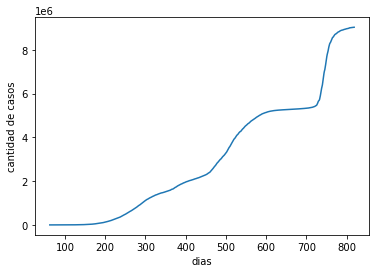

In [758]:
# Ya que pudimos llevarnos un pantallaso de la informacion con la que contamos en nuestro dataset, a continuacion, vamos a seleccionar el pais 
# Argentina para realizar un analisis mas exhaustivo del mismo:

ind_arg=np.where(paises=='Argentina')
ind_arg=ind_arg[0]
casos_arg=confirmados[ind_arg]
dias=np.arange(0,len(casos_arg))
plt.plot(dias,casos_arg)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Esta es la curva de **casos totales** de la Argentina. Aquí no se ven las olas, ya que estas se ven en la curva de casos confirmados por día, es decir, de casos nuevos. Esta habla de los acumulados, entonces siempre se agregan.

Para ver mejor la curva, podemos tomar el logartimo de los datos. Una curva exponencial se ve lineal en escala logarítmica


Text(0, 0.5, 'log cantidad de casos')

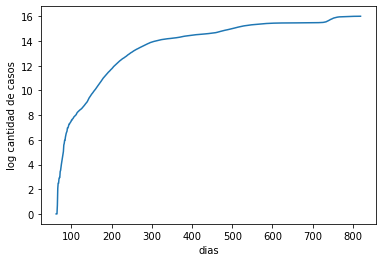

In [759]:
plt.plot(dias,np.log(casos_arg))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Veamos lo que pasa en los primeros 160 días desde que se detectó el primer caso en Argentina, para ver cómo fue el $k$ inicial

Text(0, 0.5, 'cantidad de casos')

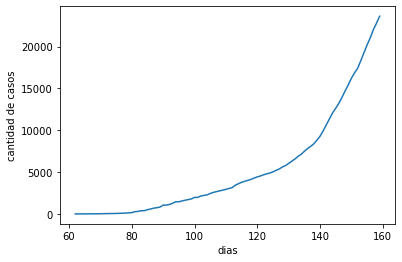

In [760]:
casos_principio=casos_arg[0:160]
dias_principio=dias[0:160]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Es difícil determinar si esta parte es exponencial. Analicemos qué pasa en escala logarítmica.

Text(0, 0.5, 'log cantidad de casos')

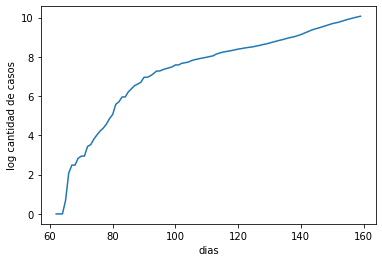

In [761]:

plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

Mejor nos quedamos con lo que sucede entre los días 60 y 100, ya que ese fue el comportamiento más sostenido.

Text(0, 0.5, 'cantidad de casos')

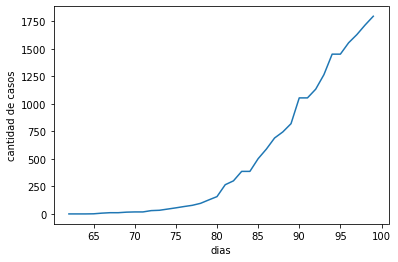

In [762]:
casos_principio=casos_arg[60:100]
dias_principio=dias[60:100]

plt.plot(dias_principio,casos_principio)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

Text(0, 0.5, 'log cantidad de casos')

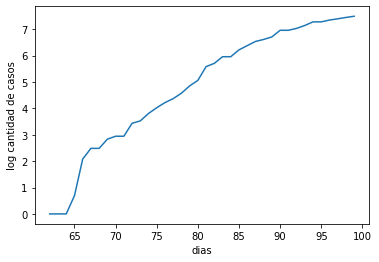

In [763]:
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('dias')
plt.ylabel('log cantidad de casos')

¡Se ve bastante lineal! Aprovechemos esto para averiguar el $k$ utilizando un ajuste hecho con el método de cuadrados mínimos, ajustando los datos al modelo 

$Confirmados=e^{k(t-t_0)}$



In [764]:
# A continuacion, vamos a quedarnos solo con los datos de argentina, y vamos a resetear los indices para obtener una tabla limpia de resultados.
arg = datos[datos['location'] == 'Argentina']
arg = arg.reset_index(drop=True)
arg.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.000,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,45605823.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
1,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,95.0,0.002,0.002,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,45605823.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,5.0,0.002,0.000,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,45605823.0,16.177,31.9,11.198,7.441,18933.907,0.6,191.032,5.5,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN


In [765]:
# Vamos a eliminar todos los registros que tengan valores nulos en las columnas location, date y total_Cases ya que no aportan 
# informacion relevante, y a continuacion vamos a intentar averiguar el K usando un ajuste, para el cual los arreglos no pueden
# contener valores nulos.
arg = arg[['location','date','total_cases']].dropna()
casos_principio = arg.total_cases[10:45]
dias_principio = np.arange(0,len(casos_principio))

In [766]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [767]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([  0.07521594, -71.69874405])

Veamos cómo se ajusta lo que obtuvimos a los datos reales

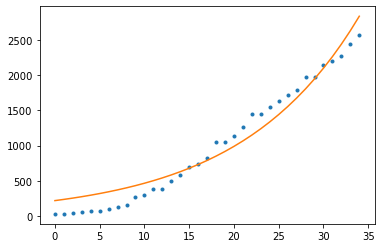

In [768]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Como última pista, hagamos una función que determine los casos nuevos por día a partir de estas curvas. Puede ser útil para tu análisis.

In [769]:
def casos_nuevos(casos):
  nuevos=np.zeros(len(casos))
  i=0
  while i<len(nuevos)-1:
    nuevos[i]=casos[i+1]-casos[i]
    i=i+1

  return nuevos   

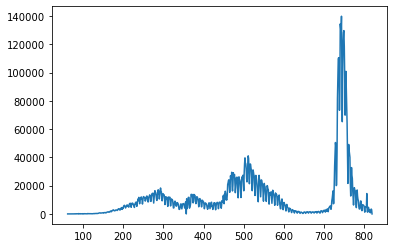

In [770]:
casos_arg=np.array(casos_arg)
nuevos_arg=casos_nuevos(casos_arg)
plt.plot(nuevos_arg)

## Eleccion de 10 paises para realizar la medicion de K

A continuacion, vamos a realizar el mismo analisis que hicimos recien pero para otros 10 paises, para ver si es posible entender el k mundial a partir de analizar una población de países en particular. 
Lo que se busca, es intentar entender si podemos predecir el comportamiento global de la pandemia a partir del estudio de unos pocos países bien elegidos y usando herramientas estadísticas estudiadas en el ultimo sprint.
Para la eleccion de los paises, me voy a centrar en los siguientes:

1.	 Alemania
2.	China
3.	Italia
4.	Peru
5.	Mexico
6.	Reino unido
7.	Sudafrica 
8.	Francia
9.	Brasil
10.	Estados unidos

Mi intencion fue elegir, por un lado, paises que fueran potencias mundiales como lo son China(donde se origino la pandemia), Estados Unidos(que a su vez fue uno de los paises con mas casos de covid a nivel mundial), Reino Unido, Francia y Alemania.
Por otro lado, tambien elegi a Brasil, pais que fue polemico en cuanto a las medidas que tomo ya que fue conocida a nivel mundial su flexibilidad.
Tambien busque un poco de variedad en cuanto a continentes, elegi a Sudafrica para considerar un pais de Africa, a Mexico y a Peru de america del norte y del sur, y a Italia de Europa.
Creo que con estos paises se puede llegar a obtener un pantallazo de los resultados a nivel global.

In [771]:
# Vamos a comenzar determinando nuestra muestra, que va a incluir solamente a los paises que mencionamos en el texto de arriba.
Muestra=['United States','China','Italy','Peru','Mexico','United Kingdom','South Africa','France','Brazil','Germany']

In [772]:
# A continuacion vamos a utilizar como filtro a la muestra de paises que acabamos de definir
datos_muestra=datos[datos.location.isin(Muestra)]
# Y vamos a corroborar que se haya realizado bien el filtrado, obteniendo los paises que tiene ahora nuestro nuevo dataset
#Veo los paises que seleccione
datos_muestra['location'].unique()

array(['Brazil', 'China', 'France', 'Germany', 'Italy', 'Mexico', 'Peru',
       'South Africa', 'United Kingdom', 'United States'], dtype=object)

### 1. Alemania

In [773]:
alemania = datos_muestra[datos_muestra['location'] == 'Germany']
alemania = alemania.reset_index(drop=True)
alemania.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,NaN,NaN,0.012,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83900471.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
1,DEU,Europe,Germany,2020-01-28,4.0,3.0,NaN,NaN,NaN,NaN,0.048,0.036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83900471.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
2,DEU,Europe,Germany,2020-01-29,4.0,0.0,NaN,NaN,NaN,NaN,0.048,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,83900471.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN


In [774]:
alemania = alemania[['location','date','total_cases']].dropna()

In [775]:
casos_principio = alemania.total_cases[25:35]
dias_principio = np.arange(0,len(casos_principio))

In [776]:
#ajustamos utilizando la funcion exponencial definida mas arriba dentro del proyecto
popt_ger, pcov_ger = curve_fit(exponencial, dias_principio, casos_principio)
popt_ger #valor de k

array([ 0.38678665, -3.1645101 ])

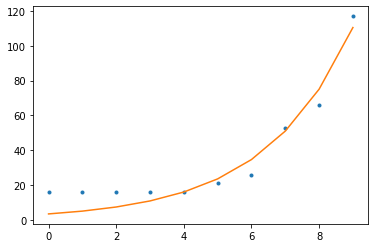

In [777]:
# Vemos como se ajusta lo que obtuvimos en relacion a los datos reales
k=popt_ger[0]
t0=popt_ger[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)


Text(0, 0.5, 'cantidad de casos')

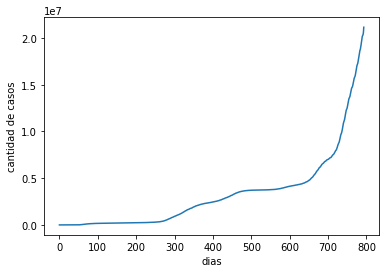

In [778]:
# Seleccionamos alemania para graficar
ind_germany=np.where(paises=='Germany')
ind_germany=ind_germany[0]
casos_alemania=confirmados[ind_germany]
dias=np.arange(0,len(casos_alemania))
plt.plot(dias,casos_alemania)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

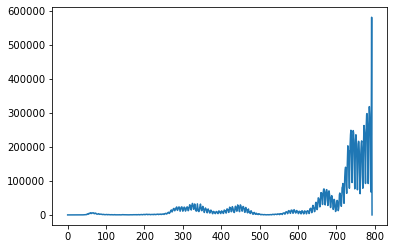

In [779]:
# Vamos a utilizar a continuacion la funcion casos_nuevos para analizar Alemania, que fue definida tambien con anterioridad en el
# codigo, para hacer el analisis de Argentina.
casos_alemania=np.array(casos_alemania)
nuevos_alemania=casos_nuevos(casos_alemania)
plt.plot(nuevos_alemania)

### 2. China

In [780]:
# A continuacion vamos a realizar lo mismo que realizamos con anterioridad para el resto de los paises, siguiendo con china:

china = datos_muestra[datos_muestra['location'] == 'China']
china = china.reset_index(drop=True)
china.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,CHN,Asia,China,2020-01-22,547.0,NaN,NaN,17.0,NaN,NaN,0.379,NaN,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.39,1.444216e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
1,CHN,Asia,China,2020-01-23,639.0,92.0,NaN,18.0,1.0,NaN,0.442,0.064,NaN,0.012,0.001,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.444216e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
2,CHN,Asia,China,2020-01-24,916.0,277.0,NaN,26.0,8.0,NaN,0.634,0.192,NaN,0.018,0.006,NaN,3.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.91,1.444216e+09,147.674,38.7,10.641,5.929,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN


In [781]:
china = china[['location','date','total_cases']].dropna()

In [782]:
casos_principio = china.total_cases[10:25]
dias_principio = np.arange(0,len(casos_principio))

In [783]:
casos_principio

10    11871.0
11    16607.0
12    19693.0
13    23680.0
14    27409.0
15    30553.0
16    34075.0
17    36778.0
18    39790.0
19    42306.0
20    44327.0
21    44699.0
22    59832.0
23    66292.0
24    68347.0
Name: total_cases, dtype: float64

In [784]:
#ajustamos
popt_china, pcov_china = curve_fit(exponencial, dias_principio, casos_principio)
popt_china #valor de k

array([  0.10118947, -96.24214474])

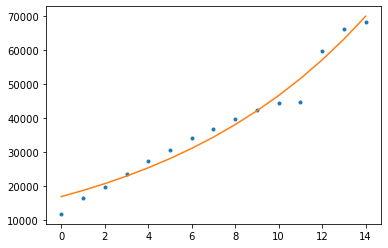

In [785]:
k=popt_china[0]
t0=popt_china[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)


Text(0, 0.5, 'cantidad de casos')

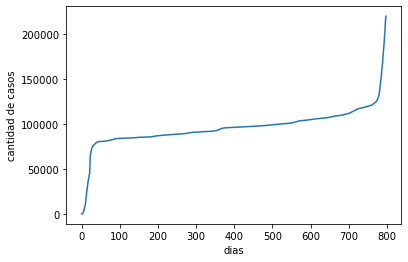

In [786]:
ind_china=np.where(paises=='China')
ind_china=ind_china[0]
casos_china=confirmados[ind_china]
dias=np.arange(0,len(casos_china))
plt.plot(dias,casos_china)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

### 3. Italia

In [787]:
italia = datos_muestra[datos_muestra['location'] == 'Italy']
italia = italia.reset_index(drop=True)
italia.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ITA,Europe,Italy,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.033,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60367471.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
1,ITA,Europe,Italy,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60367471.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
2,ITA,Europe,Italy,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.033,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44,60367471.0,205.859,47.9,23.021,16.24,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,-6878.1,-9.02,-6.19,-113.93719


In [788]:
italia = italia[['location','date','total_cases']].dropna()

In [789]:
casos_principio = italia.total_cases[10:25]
dias_principio = np.arange(0,len(casos_principio))

In [790]:
casos_principio

10      3.0
11      3.0
12      3.0
13      3.0
14      3.0
15      3.0
16      3.0
17      3.0
18      3.0
19      3.0
20      3.0
21     20.0
22     62.0
23    155.0
24    229.0
Name: total_cases, dtype: float64

In [791]:
#ajustamos
popt_italia, pcov_italia = curve_fit(exponencial, dias_principio, casos_principio)
popt_italia #valor de k

array([0.64055398, 5.44844854])

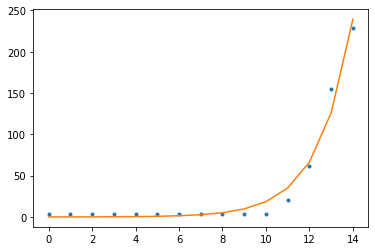

In [792]:
k=popt_italia[0]
t0=popt_italia[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Text(0, 0.5, 'cantidad de casos')

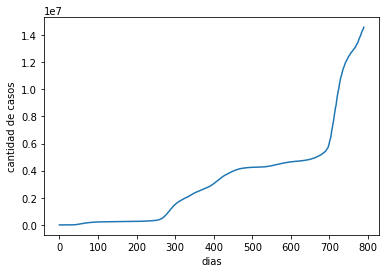

In [793]:
ind_italia=np.where(paises=='Italy')
ind_italia=ind_italia[0]
casos_italia=confirmados[ind_italia]
dias=np.arange(0,len(casos_italia))
plt.plot(dias,casos_italia)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

### 4. Peru

In [794]:
peru = datos_muestra[datos_muestra['location'] == 'Peru']
peru = peru.reset_index(drop=True)
peru.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,PER,South America,Peru,2020-03-06,1.0,1.0,NaN,1.0,1.0,NaN,0.03,0.03,NaN,0.03,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,33359415.0,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.6,76.74,0.777,NaN,NaN,NaN,NaN
1,PER,South America,Peru,2020-03-07,1.0,0.0,NaN,1.0,0.0,NaN,0.03,0.00,NaN,0.03,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,33359415.0,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.6,76.74,0.777,NaN,NaN,NaN,NaN
2,PER,South America,Peru,2020-03-08,6.0,5.0,NaN,2.0,1.0,NaN,0.18,0.15,NaN,0.06,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.89,33359415.0,25.129,29.1,7.151,4.455,12236.706,3.5,85.755,5.95,4.8,NaN,NaN,1.6,76.74,0.777,2706.0,11.77,12.57,81.11653


In [795]:
peru = peru[['location','date','total_cases']].dropna()

In [796]:
casos_principio = peru.total_cases[10:25]
dias_principio = np.arange(0,len(casos_principio))

In [797]:
casos_principio

10     86.0
11    117.0
12    145.0
13    234.0
14    234.0
15    318.0
16    363.0
17    395.0
18    416.0
19    480.0
20    580.0
21    635.0
22    671.0
23    852.0
24    950.0
Name: total_cases, dtype: float64

In [798]:
#ajustamos
popt_peru, pcov_peru = curve_fit(exponencial, dias_principio, casos_principio)
popt_peru #valor de k

array([  0.13662899, -36.21721652])

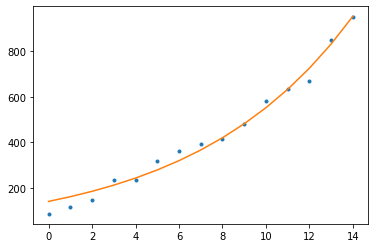

In [799]:
k=popt_peru[0]
t0=popt_peru[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Text(0, 0.5, 'cantidad de casos')

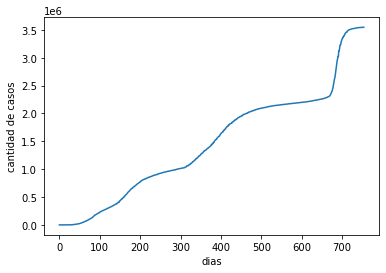

In [800]:
ind_peru=np.where(paises=='Peru')
ind_peru=ind_peru[0]
casos_peru=confirmados[ind_peru]
dias=np.arange(0,len(casos_peru))
plt.plot(dias,casos_peru)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

### 5. Mexico

In [801]:
mexico = datos_muestra[datos_muestra['location'] == 'Mexico']
mexico = mexico.reset_index(drop=True)
mexico.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,MEX,North America,Mexico,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,25.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
1,MEX,North America,Mexico,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,72.0,0.001,0.001,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
2,MEX,North America,Mexico,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.0,89.0,0.001,0.001,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,130262220.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN


In [802]:
mexico = mexico[['location','date','total_cases']].dropna()

In [803]:
casos_principio = mexico.total_cases[10:25]
dias_principio = np.arange(0,len(casos_principio))

In [804]:
casos_principio

68      7.0
69      7.0
70      8.0
71     12.0
72     26.0
73     41.0
74     53.0
75     82.0
76     93.0
77    118.0
78    164.0
79    203.0
80    251.0
81    316.0
82    367.0
Name: total_cases, dtype: float64

In [805]:
#ajustamos
popt_mexico, pcov_mexico = curve_fit(exponencial, dias_principio, casos_principio)
popt_mexico #valor de k

array([  0.23428827, -11.42455277])

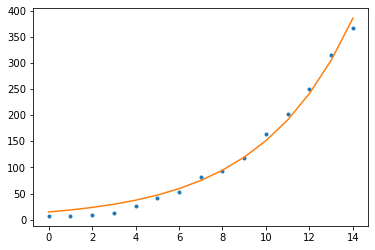

In [806]:
k=popt_mexico[0]
t0=popt_mexico[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Text(0, 0.5, 'cantidad de casos')

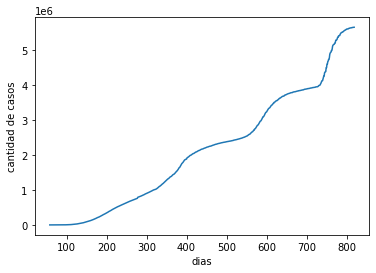

In [807]:
ind_mexico=np.where(paises=='Mexico')
ind_mexico=ind_mexico[0]
casos_mexico=confirmados[ind_mexico]
dias=np.arange(0,len(casos_mexico))
plt.plot(dias,casos_mexico)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

### 6. Reino Unido

In [808]:
reinoUnido = datos_muestra[datos_muestra['location'] == 'United Kingdom']
reinoUnido = reinoUnido.reset_index(drop=True)
reinoUnido.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
1,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
2,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,-1956.3,-2.68,-5.6,-28.681759


In [809]:
reinoUnido = reinoUnido[['location','date','total_cases']].dropna()

In [810]:
casos_principio = reinoUnido.total_cases[10:25]
dias_principio = np.arange(0,len(casos_principio))

In [811]:
casos_principio

10    14.0
11    15.0
12    16.0
13    17.0
14    18.0
15    18.0
16    18.0
17    19.0
18    19.0
19    20.0
20    22.0
21    23.0
22    23.0
23    28.0
24    30.0
Name: total_cases, dtype: float64

In [812]:
#ajustamos
popt_reinoUnido, pcov_reinoUnido = curve_fit(exponencial, dias_principio, casos_principio)
popt_reinoUnido #valor de k

array([ 4.96539184e-02, -5.28549751e+01])

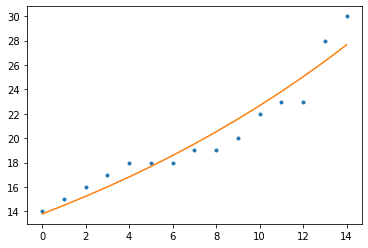

In [813]:
k=popt_reinoUnido[0]
t0=popt_reinoUnido[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Text(0, 0.5, 'cantidad de casos')

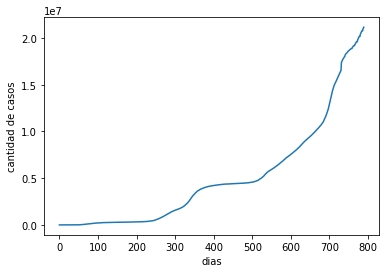

In [814]:
ind_reinoUnido=np.where(paises=='United Kingdom')
ind_reinoUnido=ind_reinoUnido[0]
casos_reinoUnido=confirmados[ind_reinoUnido]
dias=np.arange(0,len(casos_reinoUnido))
plt.plot(dias,casos_reinoUnido)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

### 7. Sudafrica

In [815]:
sudafrica = datos_muestra[datos_muestra['location'] == 'South Africa']
sudafrica = sudafrica.reset_index(drop=True)
sudafrica.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ZAF,Africa,South Africa,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,0.001,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
1,ZAF,Africa,South Africa,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,NaN,NaN,NaN,NaN
2,ZAF,Africa,South Africa,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.78,60041996.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.38,5.52,8.1,33.2,43.993,2.32,64.13,0.709,1580.2,2.82,8.13,26.318246


In [816]:
sudafrica = sudafrica[['location','date','total_cases']].dropna()

In [817]:
casos_principio = sudafrica.total_cases[10:25]
dias_principio = np.arange(0,len(casos_principio))

In [818]:
casos_principio

37      51.0
38      62.0
39      62.0
40     116.0
41     150.0
42     202.0
43     240.0
44     274.0
45     402.0
46     554.0
47     709.0
48     927.0
49    1170.0
50    1187.0
51    1280.0
Name: total_cases, dtype: float64

In [819]:
#ajustamos
popt_sudafrica, pcov_sudafrica = curve_fit(exponencial, dias_principio, casos_principio)
popt_sudafrica #valor de k

array([  0.1995823 , -22.46505862])

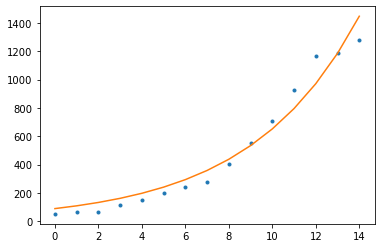

In [820]:
k=popt_sudafrica[0]
t0=popt_sudafrica[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Text(0, 0.5, 'cantidad de casos')

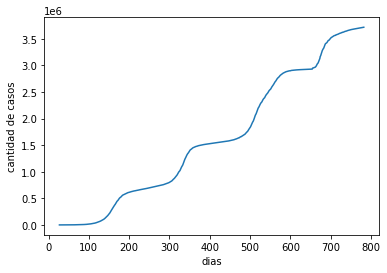

In [821]:
ind_sudafrica=np.where(paises=='South Africa')
ind_sudafrica=ind_sudafrica[0]
casos_sudafrica=confirmados[ind_sudafrica]
dias=np.arange(0,len(casos_sudafrica))
plt.plot(dias,casos_sudafrica)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

### 8. Francia

In [822]:
francia = datos_muestra[datos_muestra['location'] == 'France']
francia = francia.reset_index(drop=True)
francia.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,0.030,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,67422000.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
1,FRA,Europe,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,NaN,0.044,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,67422000.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
2,FRA,Europe,France,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,0.044,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,67422000.0,122.578,42.0,19.718,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66,0.901,-3599.6,-6.61,-7.74,-53.389101


In [823]:
francia = francia[['location','date','total_cases']].dropna()

In [824]:
casos_principio = francia.total_cases[10:25]
dias_principio = np.arange(0,len(casos_principio))

In [825]:
casos_principio

10     6.0
11     6.0
12     6.0
13     6.0
14     6.0
15    11.0
16    11.0
17    11.0
18    11.0
19    11.0
20    11.0
21    11.0
22    12.0
23    12.0
24    12.0
Name: total_cases, dtype: float64

In [826]:
#ajustamos
popt_francia, pcov_francia = curve_fit(exponencial, dias_principio, casos_principio)
popt_francia #valor de k

array([  0.05004402, -37.62783113])

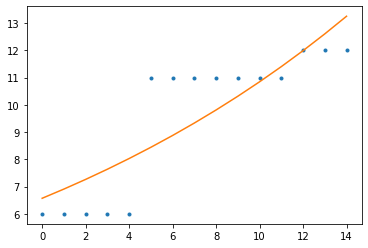

In [827]:
k=popt_francia[0]
t0=popt_francia[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Text(0, 0.5, 'cantidad de casos')

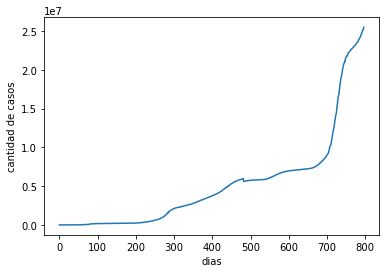

In [828]:
ind_francia=np.where(paises=='France')
ind_francia=ind_francia[0]
casos_francia=confirmados[ind_francia]
dias=np.arange(0,len(casos_francia))
plt.plot(dias,casos_francia)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

### 9. Brasil

In [829]:
brasil = datos_muestra[datos_muestra['location'] == 'Brazil']
brasil = brasil.reset_index(drop=True)
brasil.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
1,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,213993441.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


In [830]:
brasil = brasil[['location','date','total_cases']].dropna()

In [831]:
casos_principio = brasil.total_cases[10:25]
dias_principio = np.arange(0,len(casos_principio))

In [832]:
casos_principio

10      13.0
11      20.0
12      25.0
13      31.0
14      38.0
15      52.0
16     151.0
17     151.0
18     162.0
19     200.0
20     321.0
21     372.0
22     621.0
23     793.0
24    1021.0
Name: total_cases, dtype: float64

In [833]:
#ajustamos
popt_brasil, pcov_brasil = curve_fit(exponencial, dias_principio, casos_principio)
popt_brasil #valor de k

array([ 0.29877229, -9.25236685])

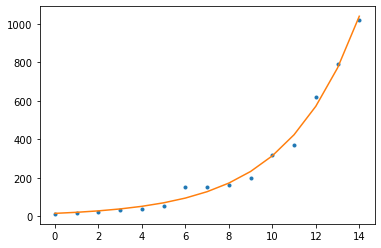

In [834]:
k=popt_brasil[0]
t0=popt_brasil[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Text(0, 0.5, 'cantidad de casos')

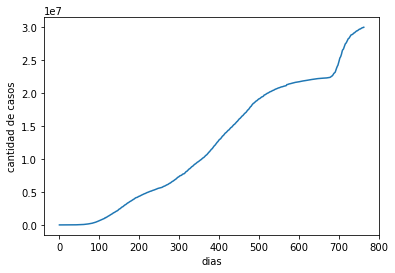

In [835]:
ind_brasil=np.where(paises=='Brazil')
ind_brasil=ind_brasil[0]
casos_brasil=confirmados[ind_brasil]
dias=np.arange(0,len(casos_brasil))
plt.plot(dias,casos_brasil)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

### 10. Estados Unidos

In [836]:
eeuu = datos_muestra[datos_muestra['location'] == 'United States']
eeuu = eeuu.reset_index(drop=True)
eeuu.head(3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
1,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
2,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [837]:
eeuu = eeuu[['location','date','total_cases']].dropna()

In [838]:
casos_principio = eeuu.total_cases[10:25]
dias_principio = np.arange(0,len(casos_principio))

In [839]:
casos_principio

10     8.0
11     8.0
12    11.0
13    11.0
14    11.0
15    12.0
16    12.0
17    12.0
18    12.0
19    12.0
20    13.0
21    13.0
22    14.0
23    14.0
24    14.0
Name: total_cases, dtype: float64

In [840]:
#ajustamos
popt_eeuu, pcov_eeuu = curve_fit(exponencial, dias_principio, casos_principio)
popt_eeuu #valor de k

array([ 3.14648479e-02, -7.11561980e+01])

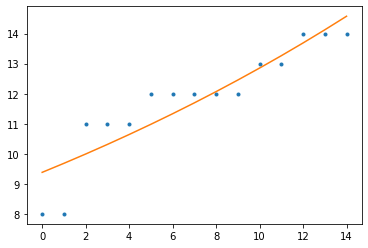

In [841]:
k=popt_eeuu[0]
t0=popt_eeuu[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)

Text(0, 0.5, 'cantidad de casos')

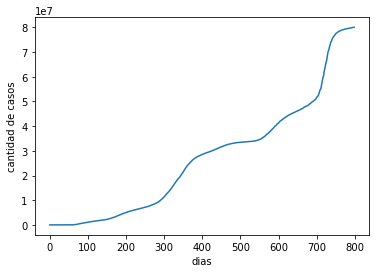

In [842]:
ind_eeuu=np.where(paises=='United States')
ind_eeuu=ind_eeuu[0]
casos_eeuu=confirmados[ind_eeuu]
dias=np.arange(0,len(casos_eeuu))
plt.plot(dias,casos_eeuu)
plt.xlabel('dias')
plt.ylabel('cantidad de casos')

## Resumen de los K obtenidos para los diferentes paises:

A continuacion, vamos a visualizar un resumen de todos los K por paises obtenidos anteriormente:

In [843]:
import pandas as pd
k_arg = round(popt[0],6)
k_alemania = round(popt_ger[0],6)
k_china = round(popt_china[0],6)
k_italia = round(popt_italia[0],6)
k_peru = round(popt_peru[0],6)
k_mexico = round(popt_mexico[0],6) 
k_reinoUnido = round(popt_reinoUnido[0],6) 
k_sudafrica = round(popt_sudafrica[0],6)
k_francia = round(popt_francia[0],6)
k_brasil = round(popt_brasil[0],6)
k_eeuu = round(popt_eeuu[0],6)

In [844]:
results = [['Argentina',k_arg],['Alemania',k_alemania],['China',k_china], ['Italia',k_italia],['Peru',k_peru], ['Mexico',k_mexico], ['Reino Unido',k_reinoUnido], ['Sudafrica',k_sudafrica], ['Francia',k_francia], ['Brasil',k_brasil], ['Estados Unidos',k_eeuu]]
table_result = pd.DataFrame(results, columns=['Pais', 'Valor_K'])
table_result

,Pais,Valor_K
0,Argentina,0.075216
1,Alemania,0.386787
2,China,0.101189
3,Italia,0.640554
4,Peru,0.136629
5,Mexico,0.234288
6,Reino Unido,0.049654
7,Sudafrica,0.199582
8,Francia,0.050044
9,Brasil,0.298772


## Metodo de boostraping

A continuación, vamos a usar el metodo de boostrapping para saber si el K promedio que medimos a partir de nuestra muestra, sirve para representar a la poblacion mundial.
Como en este caso disponemos solo de una muestra con solamente 10 paises, siendo esta representativa de la población, cabe esperar que los valores en la muestra aparezcan aproximadamente con la misma frecuencia que en la población. 
Este método se basa en generar nuevas pseudo-muestras, del mismo tamaño que la muestra original, mediante muestreo repetido de los datos con los que contamos.
Si la muestra original es representativa de la población, la distribución del estadístico calculada a partir de las pseudo-muestras (bootstrapping distribution) se aproxima a la distribución muestral que se obtendría si se pudiera acceder a la población para generar nuevas muestras.

In [845]:
from sklearn.utils import resample

bootstrap = resample(table_result.Valor_K, replace = True, n_samples = 11, random_state = 40)
print(len(bootstrap)) 

bootstrap_mean =  np.mean(bootstrap)
print('Media bootstrap:', bootstrap_mean)
boot_95 = np.percentile(bootstrap, [2.5,97.5])
print('95% = ', boot_95)

11
Media bootstrap: 0.18585254545454546
95% =  [0.03601225 0.57711225]


En la celda superior podemos ver que la media boostrap y el intervalo de confianza que muestra tiene un rango muy amplio.
Esto se puede deber a la distribucion de nuestros datos originales.

Cada pais tiene un K diferente a los demas, que posiblemente varie segun diversos factores, como pueden ser: la cantidad de personas en el pais, el tamaño del territorio, el sistema de salud entre otros.
Esto hace que los contagios crescan muy rapido, pero que con el paso del tiempo empiece a disminuir.

Podriamos considerarlo como un buen modelo ya que teniendo en cuenta como son los datos originales, obtuvimos lo que se esperaba como resutado.

## Graficos que aportan informacion para el entendimiento/interpretacion de los datos

A continuación, vamos a visualizar graficamente los diferentes valores de k para nuestros distintos paises de la muestra, de mayor a menor.

In [846]:
# Primero necesitamos usar el metodo explode para poder usar la columna valor_k de forma numerica (tomarla como un float) para poder graficar
table_result = table_result.explode('Valor_K') 
table_result['Valor_K'] = table_result['Valor_K'].astype('float')

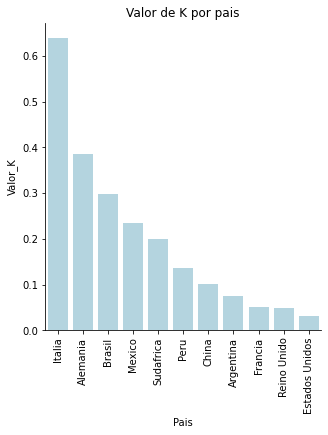

In [847]:
import seaborn as sbn

sbn.catplot(x = "Pais", y = "Valor_K", kind = "bar", data = table_result.sort_values('Valor_K',ascending=False),color = 'lightblue').set(title='Valor de K por pais')
plt.xticks(rotation=90)
warnings.filterwarnings("ignore")

Vamos a agrupar nuestros datos de la muestra por fecha, para saber cuantos casos hubo por dia a nivel mundial.

In [848]:
datos_muestra_por_fecha=datos_muestra.groupby(['date'])['total_cases'].sum().reset_index()

In [849]:
datos_muestra_por_fecha.head(30)

,date,total_cases
0,2020-01-01,0.0
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.0
4,2020-01-05,0.0
5,2020-01-06,0.0
6,2020-01-07,0.0
7,2020-01-08,0.0
8,2020-01-09,0.0
9,2020-01-10,0.0


In [850]:
# Separamos en dos variables, por un lado los casos totales, y por el otro los dias (819 dias con los que contamos en nuestra muestra)
total_cases_all_countrys=datos_muestra_por_fecha['total_cases']
dias=np.arange(0,len(datos_muestra_por_fecha))

Y a continuación, voy a graficar como fueron incrementando los casos "a nivel mundial" (va entre comillas ya que es considerando solamente los 10 países de nuestra muestra representativa). En el grafico de la izquierda, vemos como fue la curva con el paso de mas de 800 dias, y en el segundo, el de la derecha, como fueron variando los casos en los primeros 60 dias de pandemia.

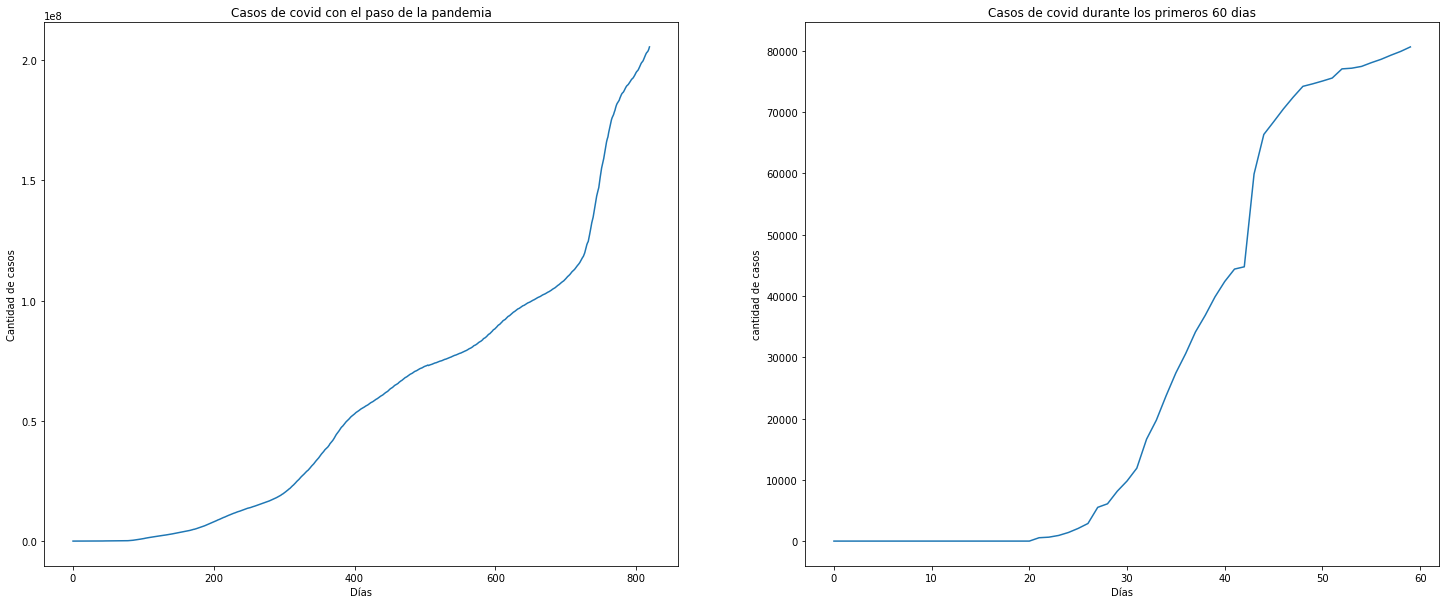

In [851]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
plt.plot(dias,total_cases_all_countrys)
plt.xlabel('Días')
plt.ylabel('Cantidad de casos')
plt.title('Casos de covid con el paso de la pandemia')
plt.subplot(1,2,2)
casos_principio=total_cases_all_countrys[0:60]
dias_principio=dias[0:60]
plt.plot(dias_principio,casos_principio)
plt.xlabel('Días')
plt.ylabel('cantidad de casos')
plt.title('Casos de covid durante los primeros 60 dias')
plt.show()

Vamos a visualizar con mayor detenimiento el comienzo de la pandemia, enfocandonos en la curva de los primeros 35 dias (gráfico de la izquierda), y en el logartitmo de los casos de los 60 primeros dias (gráfico de la derecha).

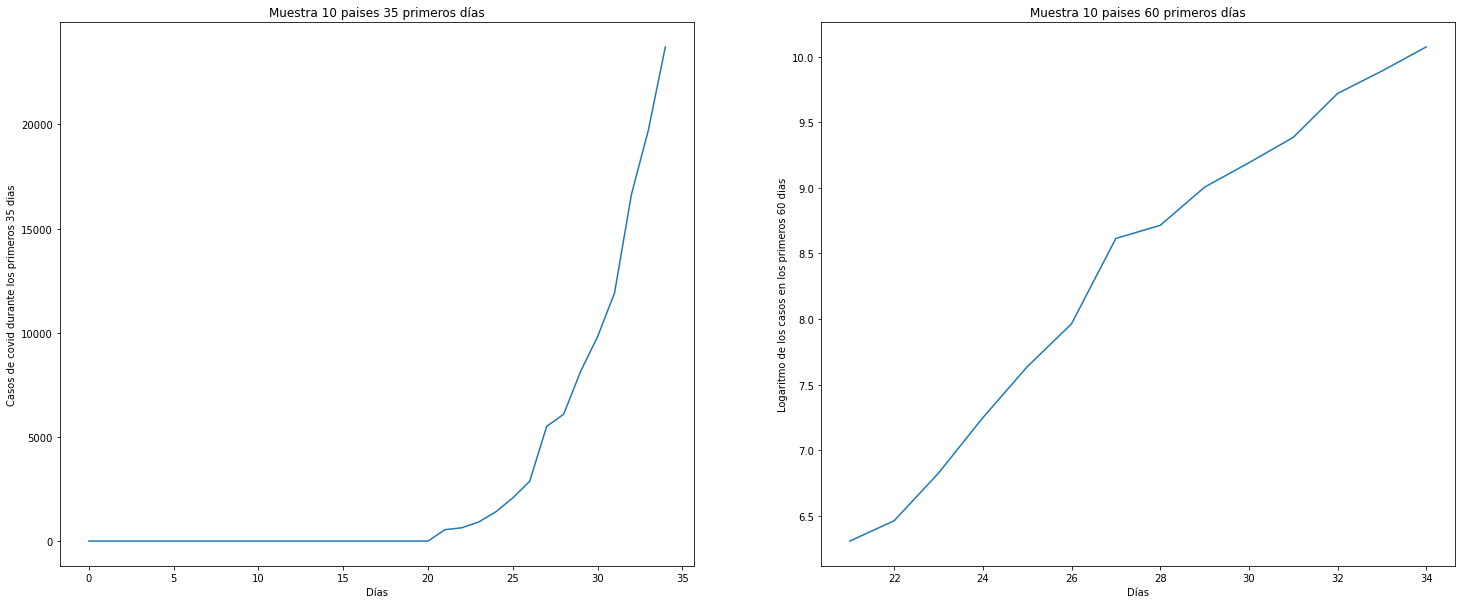

In [852]:
casos_principio=total_cases_all_countrys[0:35]
dias_principio=dias[0:35]
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
plt.plot(dias_principio,casos_principio)
plt.xlabel('Días')
plt.ylabel('Casos de covid durante los primeros 35 dias')
plt.title('Muestra 10 paises 35 primeros días')
plt.subplot(1,2,2)
plt.plot(dias_principio,np.log(casos_principio))
plt.xlabel('Días')
plt.ylabel('Logaritmo de los casos en los primeros 60 dias')
plt.title('Muestra 10 paises 60 primeros días')
np.seterr(divide = 'ignore') 
plt.show()

A continuación vamos a estimar el valor de K para nuestro conjunto de 10 paises(nivel global), como lo hicimos en el comienzo de este trabajo

In [853]:
#definimos función para ajustar modelo
def exponencial(t,k,t0):
  C=np.exp(k*(t-t0))
  return C

In [854]:
#ajustamos
popt, pcov = curve_fit(exponencial, dias_principio, casos_principio)
popt

array([ 0.24165838, -7.87350487])

Text(0.5, 1.0, 'Valores simulados vs reales - muestra de 10 paises')

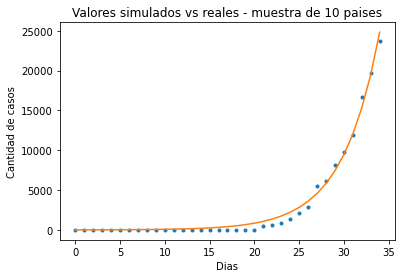

In [855]:
# Vemos como se ajusta lo que obtuvimos en relacion a los datos reales
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos')
plt.title('Valores simulados vs reales - muestra de 10 paises')

In [856]:
# Calculamos el desvio estandar
np.sqrt(pcov[0][0])

0.006605159787156609

In [857]:
# Calculamos el intervalo de confianza
z=1.96
n=35
intervalo_de_confianza=[popt[0]-z*np.sqrt(pcov[0][0])/np.sqrt(n),popt[0]+z*np.sqrt(pcov[0][0])/np.sqrt(n)]
print(intervalo_de_confianza)

[0.23947009053660384, 0.24384667559206907]


In [858]:
# Ahora vamos a seleccionamos lo casos mundiales de nuestro dataset inicial
casos_a_nivel_mundial=datos[datos['location']=='World'].groupby('date')['total_cases'].sum().reset_index()

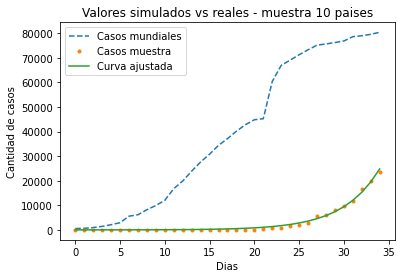

In [859]:
k=popt[0]
t0=popt[1]
casos_simu=exponencial(dias_principio,k,t0)
plt.plot(dias_principio,casos_a_nivel_mundial['total_cases'][0:35].to_numpy(),'--')
plt.plot(dias_principio,casos_principio,'.')
plt.plot(dias_principio,casos_simu)
plt.xlabel('Dias')
plt.ylabel('Cantidad de casos')
plt.title('Valores simulados vs reales - muestra 10 paises')
plt.legend(('Casos mundiales', 'Casos muestra','Curva ajustada'))

In [860]:
# Vamos a calcular nuestro error cuadratico medio
from sklearn.metrics import mean_squared_error
y_true = casos_principio
y_pred = casos_simu
mse = mean_squared_error(y_true, y_pred)
mse

277410.37497540854

In [861]:
import math
RMSE=math.sqrt(mse)
print(RMSE)

526.697612464124


In [862]:
# Vamos a calcular nuestro coeficiente de determinación
from sklearn.metrics import r2_score
coefficient_of_dermination = r2_score(y_true,y_pred)
coefficient_of_dermination

0.992357578948525

# EVALUANDO ESTRATEGIAS

A continuación, en esta sección del trabajo, me voy a enfocar en elegir una política pública para hacer un análisis sobre países que hayan implementado la misma y otros que no lo hayan realizado. 5 de cada uno.También, vamos a seleccionar 3 indicadores asociados a la política pública que ayuden a construír un clasificador.

Voy a elegir como política pública a la implementación de una cuarentena estricta o no. Dentro de nuestro dataset, contamos con una columna llamada stringency_index, que como podemos chequear en los detalles de acda columna significa: 

    ¨Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)¨
    
Es decir, esta columna representa un índice de rigurosidad de la respuesta que dio cada gobierno frente a la pandemia. Es una medida compuesta basada en 9 indicadores de respuesta, incluidos cierres de escuelas, cierres de lugares de trabajo y prohibiciones de viaje, reescalado a un valor de 0 a 100 (100 = respuesta más estricta). 

Es decir, con esta columna, podemos tener una medida o indice de restricción de actividades en cada país.


En cuanto a los indicadores de la misma, voy a elegir:

- Cantidad de muertes: la cantidad de personas que murieron en un período de tiempo.
- Cantidad de contagios: también, en un período de tiempo determinado, la cantidad de personas que se contagiaron.
- Valor de k, ver en que punto en el tiempo aumenta o baja el valor de stringency index.

Considero que estos indicadores estan estrechamente relacionados con la política pública elegida ya que, como pudimos vivirlo y experimentarlo, a medida que salíamos más a eventos sociales, o comenzaba a haber mayor movimiento, aumentaban la cantidad de contagios, y al mismo tiempo, se ocupaban mayor número de camas en los hospitales, aumentando asi los porcentajes de ocupación de los mismos, haciendo por ende que haya mayor cantidad de resintos colapsados, y por ende, mayor cantidad de muertes en adultos mayores sobre todo.

A continuación, voy a elegir 5 países que hayan aplicado medidas restrictivas fuertes, es decir, una cuarentena más estricta. (stringency_index > 60), y 5 países que no las hayan aplicado o que hayan sido mas relajados en las mismas (stringency_index < 60).

In [863]:
# Primero voy a elegir en base a lo que he averiguado en internet 5 paises que se que han aplicado cuarentena mas estricta, y otros 5 que no
muestra_estrategia=['United States','Italy','China','Germany','Uruguay','South Africa','Sweden','Peru','Mexico', 'Argentina']

In [864]:
#Filtramos nuestros datos usando la mascara
datos_muestra_estrategia=datos[datos.location.isin(muestra_estrategia)]

In [865]:
# Chequeamos que el filtrado se haya hecho de la forma deseada
datos_muestra_estrategia['location'].unique()

array(['Argentina', 'China', 'Germany', 'Italy', 'Mexico', 'Peru',
       'South Africa', 'Sweden', 'United States', 'Uruguay'], dtype=object)

In [866]:
# Separamos los datos por país
muestra_estrategia_EEUU = datos_muestra_estrategia[datos_muestra_estrategia.location.isin(['United States'])]
muestra_estrategia_Italy = datos_muestra_estrategia[datos_muestra_estrategia.location.isin(['Italy'])]
muestra_estrategia_Argentina = datos_muestra_estrategia[datos_muestra_estrategia.location.isin(['Argentina'])]
muestra_estrategia_China = datos_muestra_estrategia[datos_muestra_estrategia.location.isin(['China'])]
muestra_estrategia_Germany = datos_muestra_estrategia[datos_muestra_estrategia.location.isin(['Germany'])]
muestra_estrategia_Uruguay = datos_muestra_estrategia[datos_muestra_estrategia.location.isin(['Uruguay'])]
muestra_estrategia_SA = datos_muestra_estrategia[datos_muestra_estrategia.location.isin(['South Africa'])]
muestra_estrategia_Sweden = datos_muestra_estrategia[datos_muestra_estrategia.location.isin(['Sweden'])]
muestra_estrategia_Peru = datos_muestra_estrategia[datos_muestra_estrategia.location.isin(['Peru'])]
muestra_estrategia_Mexico = datos_muestra_estrategia[datos_muestra_estrategia.location.isin(['Mexico'])]

In [867]:
# A continuación calculamos la mediana de la columna stringency_index para cada país para asegurarnos de que haya elegido bien 5 países con 
# cuarentena estricta y 5 con cuarentena más relajada
print('EEUU: ', muestra_estrategia_EEUU['stringency_index'].median())
print('Italy: ', muestra_estrategia_Italy['stringency_index'].median())
print('Argentina: ', muestra_estrategia_Argentina['stringency_index'].median())
print('China: ', muestra_estrategia_China['stringency_index'].median())
print('Germany: ', muestra_estrategia_Germany['stringency_index'].median())
print('Uruguay: ', muestra_estrategia_Uruguay['stringency_index'].median())
print('SA: ', muestra_estrategia_SA['stringency_index'].median())
print('Sweden: ', muestra_estrategia_Sweden['stringency_index'].median())
print('Peru: ', muestra_estrategia_Peru['stringency_index'].median())
print('Mexico: ', muestra_estrategia_Mexico['stringency_index'].median())

EEUU:  58.8
Italy:  71.3
Argentina:  77.31
China:  75.46
Germany:  67.59
Uruguay:  55.56
SA:  50.93
Sweden:  55.56
Peru:  75.93
Mexico:  47.22


Para asegurarnos de que elegimos 5 paises con cuarentena mas relajada y 5 paises con cuarentena mas estricta, verifico que la mediana de stringency_index sea < 60 (menos cuarentena) y > 60 (más cuarentena), ya que este valor puede haber ido variando con el paso del tiempo.

Entonces tenemos 5 países con cuanrentena menos estricta:

 1. EEUU
 2. Uruguay
 3. South Africa
 4. Sweden
 5. Mexico

Y 5 países con cuarentena mas estricta:
 1. Italy
 2. Argentina
 3. China
 4. Germany
 5. Peru

In [868]:
# Vamos a ver rapidamente algunas columnas importantes que nos van a servir en el análisis de la estrategia de la cuarentena.
datos_muestra_estrategia[['stringency_index', 'date', 'location', 'total_cases', 'total_deaths']]

,stringency_index,date,location,total_cases,total_deaths
6054,0.00,2020-01-01,Argentina,NaN,NaN
6055,0.00,2020-01-02,Argentina,NaN,NaN
6056,0.00,2020-01-03,Argentina,NaN,NaN
6057,0.00,2020-01-04,Argentina,NaN,NaN
6058,0.00,2020-01-05,Argentina,NaN,NaN
...,...,...,...,...,...
165939,27.78,2022-03-26,Uruguay,883354.0,7150.0
165940,27.78,2022-03-27,Uruguay,884081.0,7151.0
165941,27.78,2022-03-28,Uruguay,884742.0,7154.0
165942,27.78,2022-03-29,Uruguay,885980.0,7156.0


Ahora, vamos a proceder a medir los indicadores que definimos hace un ratito, para poder elaborar modelos de regresión logística y poder usarlos en clasificaciones de otros países.

In [869]:
# Vamos primero a asegurarnos que no exista ningun valor nulo en las columnas location, date y total cases para poder luego hacer una correcta
# estimacion de k 
datos_muestra_estrategia.dropna(subset=['location', 'date', 'total_cases'], inplace=True)

In [870]:
# Vamos a comenzar midiendo el valor de K, nuestro factor de contagiabilidad.
print("Estimación de k:")
print("")
Estimacion_K=[]
Estimacion_Desvio=[]
Coef_variacion=[]
Cant_test=[]
Muerte=[]
Cant_confirmados=[]
for i in range(0,len(muestra_estrategia)):
    popt, pcov = curve_fit(exponencial, dias[0:60], datos_muestra_estrategia[datos_muestra_estrategia['location']==muestra_estrategia[i]].groupby('date')['total_cases'].sum()[0:60])
    print(muestra_estrategia[i],popt[0])
    Estimacion_K.append(popt[0])
    Estimacion_Desvio.append(np.sqrt(pcov[0][0]))
    Coef_variacion.append(np.sqrt(pcov[0][0])/ abs(popt[0]))
    muertes_i=pd.DataFrame(datos_muestra_estrategia[datos_muestra_estrategia['location']==muestra_estrategia[i]].groupby('location')['total_deaths'].sum()[0:60])
    muertes_i.reset_index(inplace=True)
    Muerte.append(muertes_i.loc[0,'total_deaths']) 
    
    test_i=pd.DataFrame(datos_muestra_estrategia[datos_muestra_estrategia['location']==muestra_estrategia[i]].groupby('location')['total_tests'].sum()[0:60])
    test_i.reset_index(inplace=True)
    Cant_test.append(test_i.loc[0,'total_tests']) 
    
    confirmados_i=pd.DataFrame(datos_muestra_estrategia[datos_muestra_estrategia['location']==muestra_estrategia[i]].groupby('location')['total_cases'].sum()[0:60])
    confirmados_i.reset_index(inplace=True)
    Cant_confirmados.append(test_i.loc[0,'total_tests']) 
    

Estimación de k:

United States 0.33414979171783066
Italy 0.10163528268134861
China 0.022741479701057794
Germany 0.18142062828230932
Uruguay 0.02454559431397325
South Africa 0.05584129629375488
Sweden 0.10482721470789633
Peru 0.08495862650057154
Mexico 0.08932497085479926
Argentina 0.05358992244752079


In [871]:
# Vamos a armar un array de los targets entre 0 y 1 para el array de paises ordenado que elegimos
Target=[0,1,1,1,0,0,0,1,0,1]

In [872]:
# Y procedo a armar una tabla con la informacion calculada
tabla_resultados_estrategia=pd.DataFrame([muestra_estrategia,Estimacion_K,Estimacion_Desvio,Coef_variacion,Cant_test,Muerte,Cant_confirmados,Target], index=['Pais', 'Valor_K','Desvio','Coef_variacion','Cant_test' ,'Cant_muertes','cant_confirmados','Target']).T
tabla_resultados_estrategia

,Pais,Valor_K,Desvio,Coef_variacion,Cant_test,Cant_muertes,cant_confirmados,Target
0,United States,0.33415,0.003817,0.011422,268613900420.0,352897711.0,268613900420.0,0
1,Italy,0.101635,0.003067,0.030179,44840882640.0,67516749.0,44840882640.0,1
2,China,0.022741,0.002549,0.112065,250000000.0,3503872.0,250000000.0,1
3,Germany,0.181421,0.002447,0.013488,5105378246.0,44517252.0,5105378246.0,1
4,Uruguay,0.024546,0.001611,0.065621,1445920756.0,2080133.0,1445920756.0,0
5,South Africa,0.055841,0.001331,0.023827,7682878808.0,35973720.0,7682878808.0,0
6,Sweden,0.104827,0.002256,0.021522,5274049809.0,8024420.0,5274049809.0,0
7,Peru,0.084959,0.001696,0.01996,7947716003.0,96490885.0,7947716003.0,1
8,Mexico,0.089325,0.001201,0.013443,4435937163.0,128019768.0,4435937163.0,0
9,Argentina,0.05359,0.001899,0.03543,9474623831.0,46457176.0,9474623831.0,1


In [873]:
# A continuación, vamos a probar el coeficiente de variación que relaciona la mediana y el desvio

def sigmoidea(x,x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return (y)

p0 = [ np.median(np.array(tabla_resultados_estrategia['Target'])),1]

popt, pcov = curve_fit(sigmoidea, np.array(tabla_resultados_estrategia['Target']), np.array(tabla_resultados_estrategia['Coef_variacion']),p0, method='dogbox')
popt

array([7.83667765, 0.45659825])

Text(0.5, 1.0, 'Regresión logistica - Variable explicativa: Coeficiente de Variación')

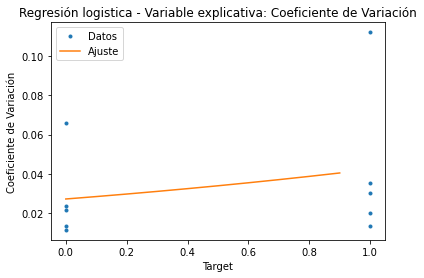

In [874]:
sigmoidea=np.vectorize(sigmoidea) # para hacer barrido por indices
x_plot=np.arange(min(np.array(tabla_resultados_estrategia['Target'])),max(np.array(tabla_resultados_estrategia['Target'])),0.1)
edad_ajustada=sigmoidea(x_plot,popt[0],popt[1])

plt.plot(np.array(tabla_resultados_estrategia['Target']),np.array(tabla_resultados_estrategia['Coef_variacion']),'.',label="Datos")
plt.plot(x_plot,edad_ajustada,label="Ajuste")
plt.legend()
plt.xlabel('Target')
plt.ylabel('Coeficiente de Variación')
plt.title('Regresión logistica - Variable explicativa: Coeficiente de Variación')

In [875]:
# Ahora vamos a probar con la variación de k
# Regresión logistica - Variable explicativa: Valor de K

def sigmoidea(x,x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return (y)

p0 = [ np.median(np.array(tabla_resultados_estrategia['Target'])),1]

popt, pcov = curve_fit(sigmoidea, np.array(df['Target']), np.array(tabla_resultados_estrategia['Valor_K']),p0, method='dogbox', maxfev=5000)
print(popt)

[1.40707857e+05 1.52060552e-05]


Text(0.5, 1.0, 'Regresión logistica - Variable explicativa: Valor de K')

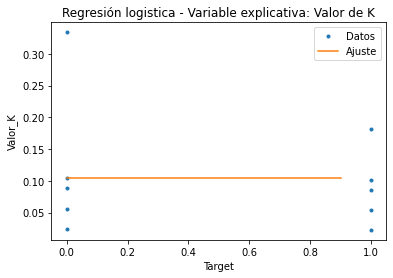

In [876]:
sigmoidea=np.vectorize(sigmoidea) #asi puedo poner un x que sea vector y sabe que tiene que hacer el barrido por indices
x_plot=np.arange(min(np.array(tabla_resultados_estrategia['Target'])),max(np.array(tabla_resultados_estrategia['Target'])),0.1)
edad_ajustada=sigmoidea(x_plot,popt[0],popt[1])

plt.plot(np.array(tabla_resultados_estrategia['Target']), np.array(tabla_resultados_estrategia['Valor_K']),'.',label="Datos")
plt.plot(x_plot,edad_ajustada,label="Ajuste")
plt.legend()
plt.xlabel('Target')
plt.ylabel('Valor_K')
plt.title('Regresión logistica - Variable explicativa: Valor de K')

In [877]:
# Regresión logistica - Variable explicativa: Cantidad de Muertes
# Ahora vamos a probar con el indice cantidad de muertes

def sigmoidea(x,x0, k):
    y = 1 / (1 + np.exp(-k*(x-x0)))
    return (y)

p0 = [ np.median(np.array(tabla_resultados_estrategia['Target'])),1]

popt, pcov = curve_fit(sigmoidea, np.array(tabla_resultados_estrategia['Target']), np.array(tabla_resultados_estrategia['Cant_muertes']),p0, method='dogbox', maxfev=5000)
popt

array([-0.5       ,  0.99571004])

Text(0.5, 1.0, 'Regresión logistica - Variable explicativa: Cantidad de Muertes')

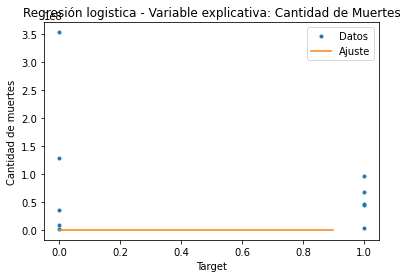

In [878]:
sigmoidea=np.vectorize(sigmoidea) #asi puedo poner un x que sea vector y sabe que tiene que hacer el barrido por indices
x_plot=np.arange(min(np.array(tabla_resultados_estrategia['Target'])),max(np.array(tabla_resultados_estrategia['Target'])),0.1)
edad_ajustada=sigmoidea(x_plot,popt[0],popt[1])

plt.plot(np.array(tabla_resultados_estrategia['Target']), np.array(tabla_resultados_estrategia['Cant_muertes']),'.',label="Datos")
plt.plot(x_plot,edad_ajustada,label="Ajuste")
plt.legend()
plt.xlabel('Target')
plt.ylabel('Cantidad de muertes')
plt.title('Regresión logistica - Variable explicativa: Cantidad de Muertes')

Y a continuación, vamos a ajustar una regresión logística teniendo en cuenta todos los atributos

In [879]:
# Vamos a comenzar creando un nuevo df tabla_resultados_estrategia_2, reseteando el index del mismo teniendo en cuenta el Pais
tabla_resultados_estrategia_2=tabla_resultados_estrategia
tabla_resultados_estrategia_2.set_index('Pais', inplace=True)

In [880]:
# A continuación podemos ver como queda la tabla con el indice País
tabla_resultados_estrategia_2

,Valor_K,Desvio,Coef_variacion,Cant_test,Cant_muertes,cant_confirmados,Target
Pais,,,,,,,
United States,0.33415,0.003817,0.011422,268613900420.0,352897711.0,268613900420.0,0
Italy,0.101635,0.003067,0.030179,44840882640.0,67516749.0,44840882640.0,1
China,0.022741,0.002549,0.112065,250000000.0,3503872.0,250000000.0,1
Germany,0.181421,0.002447,0.013488,5105378246.0,44517252.0,5105378246.0,1
Uruguay,0.024546,0.001611,0.065621,1445920756.0,2080133.0,1445920756.0,0
South Africa,0.055841,0.001331,0.023827,7682878808.0,35973720.0,7682878808.0,0
Sweden,0.104827,0.002256,0.021522,5274049809.0,8024420.0,5274049809.0,0
Peru,0.084959,0.001696,0.01996,7947716003.0,96490885.0,7947716003.0,1
Mexico,0.089325,0.001201,0.013443,4435937163.0,128019768.0,4435937163.0,0


In [881]:
# Vamos a calcular el promedio de las muertes, haciendo cantidad de muertes / cantidad de confirmados
tabla_resultados_estrategia_2['prom_muertes']=tabla_resultados_estrategia_2['Cant_muertes']/tabla_resultados_estrategia_2['cant_confirmados']

In [882]:
# Visualizamos esta nueva columna en nuestro dataframe
pd.DataFrame(tabla_resultados_estrategia_2)

,Valor_K,Desvio,Coef_variacion,Cant_test,Cant_muertes,cant_confirmados,Target,prom_muertes
Pais,,,,,,,,
United States,0.33415,0.003817,0.011422,268613900420.0,352897711.0,268613900420.0,0,0.001314
Italy,0.101635,0.003067,0.030179,44840882640.0,67516749.0,44840882640.0,1,0.001506
China,0.022741,0.002549,0.112065,250000000.0,3503872.0,250000000.0,1,0.014015
Germany,0.181421,0.002447,0.013488,5105378246.0,44517252.0,5105378246.0,1,0.00872
Uruguay,0.024546,0.001611,0.065621,1445920756.0,2080133.0,1445920756.0,0,0.001439
South Africa,0.055841,0.001331,0.023827,7682878808.0,35973720.0,7682878808.0,0,0.004682
Sweden,0.104827,0.002256,0.021522,5274049809.0,8024420.0,5274049809.0,0,0.001521
Peru,0.084959,0.001696,0.01996,7947716003.0,96490885.0,7947716003.0,1,0.012141
Mexico,0.089325,0.001201,0.013443,4435937163.0,128019768.0,4435937163.0,0,0.02886


In [883]:
# Vamos a implementar el modelo
X = np.array(tabla_resultados_estrategia_2.drop(['Target'],1))
y = np.array(tabla_resultados_estrategia_2['Target']).astype('int')
X.shape

(10, 7)

In [884]:
#Ajustamos el modelo en train y test
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [885]:
predictions = model.predict(X)
predictions_proba = model.predict_proba(X)

In [886]:
#Area bajo la curva
Auc=roc_auc_score(y, pd.DataFrame(predictions_proba)[1])
print('Area bajo la curva:',Auc)

Area bajo la curva: 0.68


Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.680


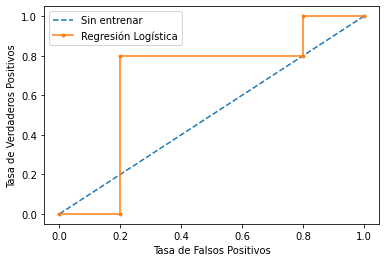

In [887]:
ns_probs = [0 for _ in range(len(y))]
# Entrenamos nuestro modelo de reg log

lr_probs = model.predict_proba(X)
# Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y, ns_probs)
lr_auc = roc_auc_score(y, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

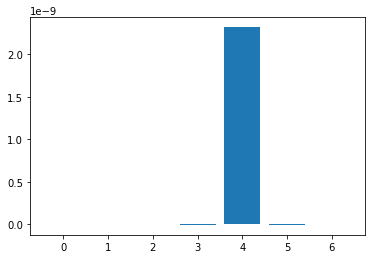

In [888]:
# Vamos a graficar el calculo de las feature importance
importance = model.coef_[0]
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [889]:
# Y a continuacion podemos ver cada atributo con su respectiva importance
importances = pd.DataFrame(data={
    'Attribute': tabla_resultados_estrategia_2[['Valor_K', 'Desvio', 'Coef_variacion', 'Cant_test', 'Cant_muertes',
       'cant_confirmados', 'prom_muertes']].columns,
    'Importance': model.coef_[0]
})
importances

,Attribute,Importance
0,Valor_K,1.020126e-17
1,Desvio,4.145477e-19
2,Coef_variacion,7.368641e-18
3,Cant_test,-5.554689e-12
4,Cant_muertes,2.319420e-09
5,cant_confirmados,-5.554689e-12
6,prom_muertes,4.880040e-19


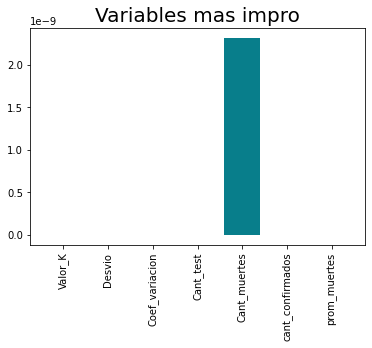

In [890]:
# Vamos a graficarlo, viendo que el atributo que aporta mayor informacion es la cantidad de muertes.
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Variables mas impro', size=20)
plt.xticks(rotation='vertical')
plt.show()

# INVESTIGACION - INFORME

El informe final se encuentra en un documento pdf aparte, llamado RocioPiantoniProyecto4_informe.pdf

Plantea nuevas preguntas en base al trabajo que hiciste y en las que se pueda ahondar

Elabora un informe con todo lo que hiciste

Debes explicar qué te gustaría probar, por qué y cómo lo harías. Si tienes referencias (por ejemplo, un artículo que hayas encontrado, capítulo de libro, etc.) debes mencionarlas.

Debes comentar también qué resultados esperas encontrar. Por ejemplo, puedes implementar una prueba rápida y mostrar resultados preliminares, para ver si estás correctamente orientado.